In [1]:
pip install tensorflow gensim keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[]
Epoch 1/10
270/270 [==============================] - 3s 7ms/step - loss: 0.4546 - accuracy: 0.8559 - val_loss: 0.2918 - val_accuracy: 0.9167
Epoch 2/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2810 - accuracy: 0.9315 - val_loss: 0.2654 - val_accuracy: 0.9167
Epoch 3/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2413 - accuracy: 0.9400 - val_loss: 0.2631 - val_accuracy: 0.9219
Epoch 4/10
270/270 [==============================] - 2s 6ms/step - loss: 0.2177 - accuracy: 0.9487 - val_loss: 0.2669 - val_accuracy: 0.9219
Epoch 5/10
270/270 [==============================] - 2s 7ms/step - loss: 0.2025 - accuracy: 0.9542 - val_loss: 0.2727 - val_accuracy: 0.9198
Epoch 6/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1930 - accuracy: 0.9569 - val_loss: 0.2798 - val_accuracy: 0.9219
Epoch 7/10
270/270 [==============================] - 2s 6ms/step - loss: 0.1859 - accuracy: 0.9594 - val_loss: 0.2872 - val_accuracy: 0.9187
Epo

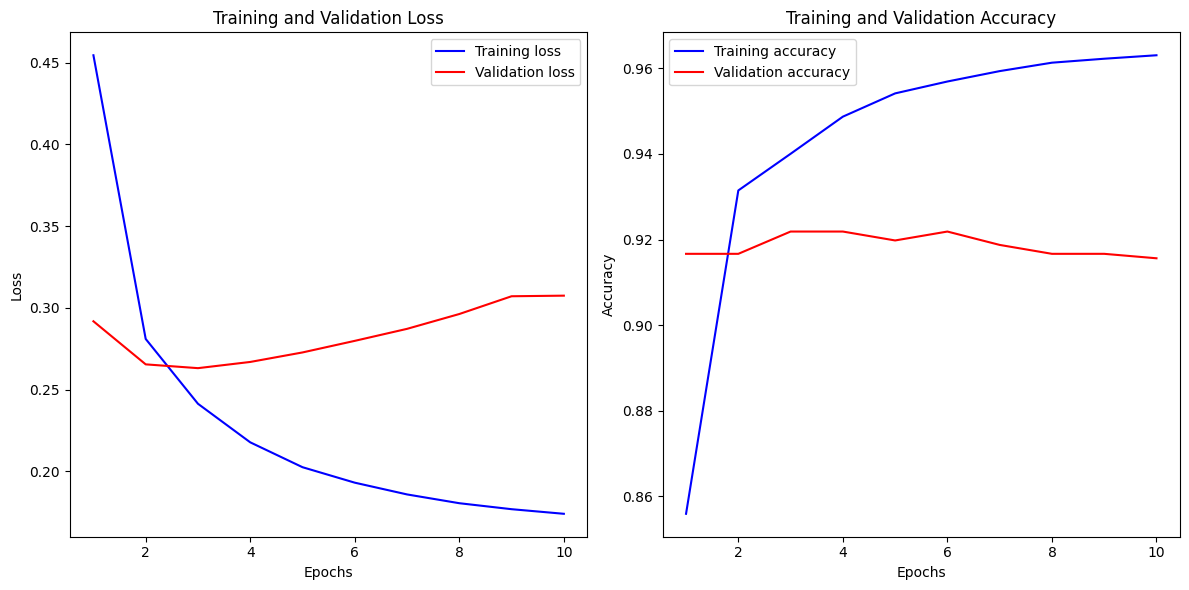

In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Reshape
from sklearn.metrics import precision_recall_fscore_support
from keras.utils import to_categorical

file_path = r'D:\Research\Python\Notebooks\Final Notebooks\Training Data\Manually_Annotated_data_new.csv'
df = pd.read_csv(file_path, encoding='UTF-8', engine='python')

# Mapping sentiment labels to numerical values
Labelled_sentiment = {
    -1: 0,   # negative sentiment
    0: 1,    # neutral sentiment
    1: 2     # positive sentiment
}

# Update the 'Labelled_sentiment' column in the DataFrame
df['Labelled_sentiment'] = df['Labelled_sentiment'].map(Labelled_sentiment)

X = df['Preprocessed_Text'].astype(str)  # Features
y_true = df['Labelled_sentiment']  # True Labels
y_true = np.nan_to_num(y_true, nan=0)  # Replace NaN values with 0 for neutral sentiment

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Create and fit the TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Check for negative label values
negative_labels = np.where(y_train == -1)[0]
print(negative_labels)

# Convert the 2D array to a 3D array by adding the time step dimension
time_steps = 1
X_train_rnn = X_train_tfidf.toarray().reshape(X_train_tfidf.shape[0], time_steps, X_train_tfidf.shape[1])
X_test_rnn = X_test_tfidf.toarray().reshape(X_test_tfidf.shape[0], time_steps, X_test_tfidf.shape[1])

# Create the RNN model
model = Sequential()
model.add(SimpleRNN(64, input_shape=(time_steps, X_train_tfidf.shape[1])))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the sentiment analysis task
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_split=0.1)


# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_rnn, y_test)
print("\nTesting Set:")
print("Loss:", loss)
print("Accuracy:", accuracy)

# Convert true labels to categorical format
y_test_categorical = to_categorical(y_test, num_classes=3)

# Make predictions on test data
y_pred = model.predict(X_test_rnn)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Display loss and accuracy during training
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# Save the trained model
model.save(r'D:\Research\Python\Notebooks\Final Notebooks\Trained Models\sentiment_analysis_rnn_model_Trained.h5')


c:\Users\rasikac\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<h2> Using trained Model to Label tweets</h2>

In [4]:
unlabelled_data = pd.read_csv(r'D:\Research\Python\Data\WIP\Sentiment_RNN_Stepped\3000001-3491812.csv', encoding='UTF-8', engine='python')


X_unlabelled = unlabelled_data['Text_Lemmatized'].astype(str)

In [5]:
unlabelled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441123 entries, 0 to 441122
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Datetime                  441123 non-null  object 
 1   Tweet Id                  441123 non-null  int64  
 2   Original Text             441123 non-null  object 
 3   Username                  441123 non-null  object 
 4   date                      441123 non-null  object 
 5   keyword                   441123 non-null  object 
 6   Text                      441123 non-null  object 
 7   Mentions                  286706 non-null  object 
 8   Hashtags                  78969 non-null   object 
 9   URL Removed Text          441123 non-null  object 
 10  Emoji Removed Text        441123 non-null  object 
 11  Character Processed Text  441123 non-null  object 
 12  StopWordRemovedText       441122 non-null  object 
 13  Text_Lemmatized           441122 non-null  o

In [6]:
# Define the chunk size 
chunk_size = 10000

# Get the total number of data points
total_samples = unlabelled_data.shape[0]

# Initialize an empty list to store the predicted sentiments
predicted_sentiments = []

# Iterate over the data in chunks
for start in range(0, total_samples, chunk_size):
    end = min(start + chunk_size, total_samples)
    chunk = unlabelled_data['Text_Lemmatized'].astype(str).iloc[start:end]
    
    # Transform the text data to TF-IDF vectors
    X_unlabelled_tfidf = vectorizer.transform(chunk)
    X_unlabelled_rnn = X_unlabelled_tfidf.toarray().reshape(X_unlabelled_tfidf.shape[0], time_steps, X_unlabelled_tfidf.shape[1])

    # Make predictions on the chunk
    y_unlabelled_pred = model.predict(X_unlabelled_rnn)
    y_unlabelled_pred_labels = np.argmax(y_unlabelled_pred, axis=1)

    # Map numerical labels back to original sentiment labels
    sentiment_mapping = {v: k for k, v in Labelled_sentiment.items()}
    y_unlabelled_sentiment = np.vectorize(sentiment_mapping.get)(y_unlabelled_pred_labels)
    
    # Append the predicted sentiments for this chunk to the list
    predicted_sentiments.extend(y_unlabelled_sentiment)

# Save the predicted sentiments to the DataFrame
unlabelled_data['RNN_SENTIMENT'] = predicted_sentiments

# Save the DataFrame with the 'RNN_SENTIMENT' column to a new CSV file
output_file_path = r'D:\Research\Python\Data\WIP\Sentiment_RNN_Stepped\3000001-3491812_with_sentiment.csv'
unlabelled_data.to_csv(output_file_path, index=False)

36/36 [==============================] - 0s 2ms/step
